In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import cv2
from skimage.measure import label

%matplotlib inline

In [2]:
def lines_seg(image):
    image = 255 - image 
    lined = np.sum(image, 1)
    threshold = 10
    lines_ind = []
    inertion = 0
    cut = False
    k1 = 0
    k2 = 0
    for i in range(lined.size):   
        if (lined[i] > threshold)and(not(cut)):
            k1 = i - 4
            cut = True
            inertion = 10    
        if (lined[i] < threshold)and(cut)and(inertion == 0):
            k2 = i + 4
            cut = False
            lines_ind.append((k1,k2))
        inertion = max(0, inertion - 1)
    return lines_ind

def words_seg(line):
    line = 255 - line
    size = line.shape[1]
    words_ind = []
    words_hist = np.sum(line, 0)
    threshold = 0
    inertion = 0
    cut = False
    k1 = 0
    k2 = 0
    for i in range(words_hist.size):
        place = words_hist[i]
        for k in range(5):
            place += words_hist[(i+k)%size]
        if (place > threshold)and(not(cut)):
            k1 = i
            cut = True  
        if (place <= threshold)and(cut):
            k2 = i
            cut = False
            if (k2 - k1 > 5):
                words_ind.append((k1,k2))
    return words_ind

def chars_seg(word):
    word = 255 - word
    labeled_word = label(word)
    labels = list(set(labeled_word.flatten()))
    labels.remove(0)
    if len(labels) == 1:
        return word
    chars = []
    for i in range(len(labels)):
        chars.append(np.zeros(shape=word.shape))
        filtering = labeled_word ==labels[i]
        chars[i] = 255*filtering
        chars[i] = crop_char(chars[i])
    return chars

def crop_char(char):
    left = 0
    size = 20
    right = char.shape[1] - 1
    bottom = char.shape[0] - 1
    top = 0
    stop = False
    ver = np.sum(char, 1)
    hor = np.sum(char, 0)
    for i in range(char.shape[0]):
        if (ver[i] <> 0)and(not(stop)):
            stop = True
            top = i
        if (ver[i] == 0) and(stop):
            bottom = i
            stop = False
    for i in range(char.shape[1]):
        if (hor[i] <> 0)and(not(stop)):
            stop = True
            left = i
        if (hor[i] == 0) and(stop):
            right = i
            stop = False
            
        
    return char[(top+bottom)/2-16:(top+bottom)/2+16,(left+right)/2-15:(left+right)/2+16]
    

In [3]:
image = cv2.imread('../resources/exam.jpg',0)

In [4]:
ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
lines_ind = lines_seg(image)
for i in range(len(lines_ind)-1):
    cv2.imwrite('./lines/line' +str(i) + '.png', image[lines_ind[i][0]:lines_ind[i][1]])

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [249]:
word_im = []
for i in range(len(lines_ind)):
    word_im.append(list())
    line = image[lines_ind[i][0]:lines_ind[i][1]]
    words_ind = words_seg(line)
    for j in range(len(words_ind)):
        word_im[i].append(line[:,words_ind[j][0]:words_ind[j][1]])

In [259]:
k = 0
chars_im = []
for i in range(len(word_im)):
    chars_im.append(list())
    for j in range(len(word_im[i])):
        chars_im[i].append(list())
        seg = chars_seg(word_im[i][j])
        for k in range(len(seg)):
            chars_im[i][j].append(seg[k])

In [260]:
for i in range(len(chars_im)):
    for j in range(len(chars_im[i])):
        for k in range(len(chars_im[i][j])):
            if chars_im[i][j][k].shape[0] > maxshape0:
                maxshape0 = chars_im[i][j][k].shape[0]
            if chars_im[i][j][k].shape[1] > maxshape1:
                maxshape1 = chars_im[i][j][k].shape[1]

IndexError: tuple index out of range

In [252]:
maxshape0 = 0
maxshape1 = 0

In [253]:
maxshape1

0

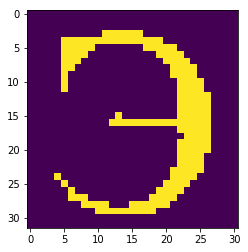

In [257]:
plt.imshow(chars_im[0][0][0])

In [255]:
chars_im[0][0][5].shape

(32, 31)

In [258]:
word_im

[[array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ..., 
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ..., 
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ..., 
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 